# Why pytorch ?

Pytorch looks a lot like numpy. And it has a lot of advantages. Let's see:

## Linear regression with pytorch

In [2]:
import torch
import matplotlib.pyplot as plt

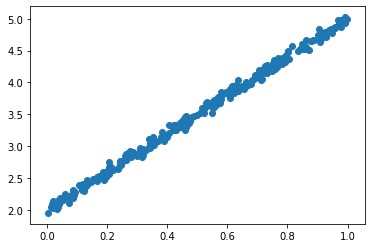

In [4]:
# see how close torch is to numpy ?
x = torch.rand(300)
y = 3 * x + 2 + (torch.randn(300) * 0.05)
plt.scatter(x, y)
plt.show()

In [5]:
# pytorch has a concept of "Parameter", you'll see how powerful it is in a moment
# fill in the blank
a = torch.nn.Parameter(torch.tensor(1.))
b = 
print(a, b)

In [51]:
# whenever you calculate something using parameters (i.e, tensors with gradients),
# you can do something.backward()
print(a.grad)
c = a * b
c.backward()
print(a.grad)
a.grad.zero_()
print(a.grad)

tensor(0.)
tensor(1.)
tensor(0.)


In [7]:
# You'll get an error message. It should be easy to debug ;-)
y_pred = (a * x + b).numpy()
plt.scatter(x, y)
plt.plot(x, y_pred)

RuntimeError: Can't call numpy() on Variable that requires grad. Use var.detach().numpy() instead.

In [143]:
# Re-initialize your parameters (just to avoid running the cell above each time your repeat the experiment)
a = 
b = 
lr =  # choose a learning rate
n_epochs  # pick a number of epochs

for epoch in range(n_epochs):
    # calculate the preds
    y_pred = 

    # calculate the loss
    mse = 
    if epoch % 1000 == 0:
        print(mse)

    # backward pass:
    mse.____  # use what you've learned above

    # gradient descent:
    with torch.no_grad():
        a -= a._____ * lr  # use what you've learned above
        b -= 
        # here, if you don't put your gradients to zero, they will accumulate:
        a.________
        b.________

tensor(4.3815, grad_fn=<MeanBackward0>)
tensor(0.1179, grad_fn=<MeanBackward0>)
tensor(0.0703, grad_fn=<MeanBackward0>)
tensor(0.0539, grad_fn=<MeanBackward0>)
tensor(0.0416, grad_fn=<MeanBackward0>)
tensor(0.0322, grad_fn=<MeanBackward0>)
tensor(0.0252, grad_fn=<MeanBackward0>)
tensor(0.0198, grad_fn=<MeanBackward0>)
tensor(0.0158, grad_fn=<MeanBackward0>)
tensor(0.0127, grad_fn=<MeanBackward0>)


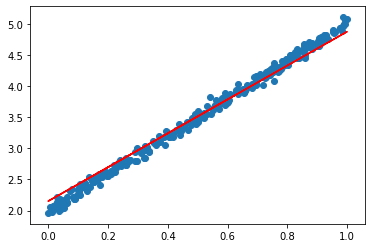

In [144]:
y_pred = (a * x + b).detach().numpy()
plt.scatter(x, y)
plt.plot(x, y_pred, color="red")

In [145]:
print(a, b)

Parameter containing:
tensor(2.7264, requires_grad=True) Parameter containing:
tensor(2.1500, requires_grad=True)


### Learn more
You'll find another approach that uses more advanced pytorch functionalities <a href="https://github.com/fastai/course-v3/blob/master/nbs/dl1/lesson2-sgd.ipynb"> here</a>, but it requires having the fastai library installed


In [148]:
# An interesting thing they do differently
# is they store a and b in a single vector
# And then perform matrix-vector multiplication

In [150]:
x = torch.ones(200, 2)
a = torch.nn.Parameter(torch.tensor([1., 1.]))

In [151]:
a @ x

RuntimeError: size mismatch, m1: [1 x 2], m2: [200 x 2] at /opt/conda/conda-bld/pytorch_1570910687650/work/aten/src/TH/generic/THTensorMath.cpp:197

In [152]:
x @ a

tensor([2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
        2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
        2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
        2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
        2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
        2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
        2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
        2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
        2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
        2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
        2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
        2., 2.], grad_fn=<MvBackward>)

To get a visual understanding of matrix-vector (or matrix-matrix) multiplications, <a href="http://matrixmultiplication.xyz/"> visit this link </a>

You can find a pytorch tutorial that dives deeply into the autograd and computation graph here <a href="https://towardsdatascience.com/understanding-pytorch-with-an-example-a-step-by-step-tutorial-81fc5f8c4e8e"> here </a>